In [ ]:
!pip install pycaret

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/distan_lat42.225lon-8.63p10R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
import pandas as pd
station_all=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_station/LEVX.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
station_all


,temp_o,tempd_o,rh_o,dir_o,spd_o,wind_gust_o,mslp_o,visibility_o,skyc1_o,skyc2_o,skyc3_o,skyl1_o,skyl2_o,skyl3_o,wxcodes_o,metar_o,fr_o
time,,,,,,,,,,,,,,,,,
2008-01-01 00:00:00,278.550001,277.950000,95.91,220.0,3.601108,M,1023.0,9994.0,M,M,M,M,M,M,M,LEVX 010000Z AUTO 22007KT 9SM 05/05 A3021 RMK ...,VFR
2008-01-01 01:00:00,278.050000,277.450001,95.89,230.0,3.086664,M,NaN,NaN,M,M,M,M,M,M,M,LEVX 010100Z AUTO 23006KT 05/04 RMK SLP235 T00...,VFR
2008-01-01 02:00:00,278.050000,277.649999,97.24,190.0,5.144440,M,1022.0,9656.0,M,M,M,M,M,M,M,LEVX 010200Z AUTO 19010KT 6SM 05/04 A3018 RMK ...,VFR
2008-01-01 02:30:00,276.150001,275.149999,93.14,240.0,3.601108,M,1021.0,9656.0,M,M,M,M,M,M,M,LEVX 010230Z AUTO 24007KT 6SM 03/02 A3015 RMK ...,VFR
2008-01-01 03:00:00,278.750001,277.549999,91.98,230.0,3.086664,M,1022.0,9994.0,M,M,M,M,M,M,M,LEVX 010300Z AUTO 23006KT 9SM 06/04 A3018 RMK ...,VFR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 21:30:00,278.150000,278.150000,100.00,50.0,2.572220,M,1028.0,9994.0,M,M,M,M,M,M,M,LEVX 242130Z 05005KT 020V080 CAVOK 05/05 Q1028...,VFR
2020-12-24 22:00:00,278.150000,277.150000,93.24,60.0,2.057776,M,1028.0,9994.0,M,M,M,M,M,M,M,LEVX 242200Z 06004KT 030V110 CAVOK 05/04 Q1028...,VFR
2020-12-24 22:30:00,278.150000,277.150000,93.24,80.0,1.543332,M,1028.0,9994.0,M,M,M,M,M,M,M,LEVX 242230Z 08003KT 340V150 CAVOK 05/04 Q1028...,VFR


In [5]:
from pandas.core.algorithms import value_counts
pd.options.display.max_rows = 999
#station.value_counts()
station=station_all[["temp_o","wxcodes_o"]].astype(str)
station["wxcodes_o"].value_counts(dropna=True,normalize=True)

M                 0.814456
BCFG              0.046308
FG                0.020785
BR                0.014783
-RA               0.013204
VCFG              0.008877
RA                0.008567
-RA BCFG          0.006626
RA BCFG           0.005710
SHRA              0.003612
-RA BR            0.003477
RA BR             0.003149
BCFG -RA          0.002875
-RA FG            0.002848
BCFG RA           0.002595
-DZ               0.002578
-DZ BCFG          0.002543
RA FG             0.002386
PRFG              0.002329
DZ                0.001972
BCFG DZ           0.001740
BCFG -DZ          0.001740
DZ BCFG           0.001714
-DZ FG            0.001348
FG DZ             0.001309
-DZ BR            0.001243
-SHRA             0.001243
BR BCFG           0.001016
FG -DZ            0.000999
FG -RA            0.000990
DZ FG             0.000925
DZ BR             0.000872
FG RA             0.000776
VCSH              0.000563
-RADZ BCFG        0.000506
-RA VCFG          0.000502
BR RA             0.000489
B

In [6]:
station["prec_l"]="No RA/DZ"
mask=station['wxcodes_o'].str.contains("RA")
station.loc[mask,["prec_l"]]="RA/DZ"
mask=station['wxcodes_o'].str.contains("DZ")
station.loc[mask,["prec_l"]]= "RA/DZ"
station=station.drop(columns=["temp_o"])
print(station.value_counts())
print(station.sample(40))

wxcodes_o       prec_l  
M               No RA/DZ    186714
BCFG            No RA/DZ     10616
FG              No RA/DZ      4765
BR              No RA/DZ      3389
-RA             RA/DZ         3027
VCFG            No RA/DZ      2035
RA              RA/DZ         1964
-RA BCFG        RA/DZ         1519
RA BCFG         RA/DZ         1309
SHRA            RA/DZ          828
-RA BR          RA/DZ          797
RA BR           RA/DZ          722
BCFG -RA        RA/DZ          659
-RA FG          RA/DZ          653
BCFG RA         RA/DZ          595
-DZ             RA/DZ          591
-DZ BCFG        RA/DZ          583
RA FG           RA/DZ          547
PRFG            No RA/DZ       534
DZ              RA/DZ          452
BCFG DZ         RA/DZ          399
BCFG -DZ        RA/DZ          399
DZ BCFG         RA/DZ          393
-DZ FG          RA/DZ          309
FG DZ           RA/DZ          300
-DZ BR          RA/DZ          285
-SHRA           RA/DZ          285
BR BCFG         No RA/DZ      

In [7]:
station["prec_l"].value_counts(normalize=True)

No RA/DZ    0.910957
RA/DZ       0.089043
Name: prec_l, dtype: float64

**Forecast D0**

In [67]:
#ria forecast d0
model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD0.csv",parse_dates=["time"]).set_index("time")
model4k.columns

Index(['dir0', 'mod0', 'wind_gust0', 'mslp0', 'temp0', 'rh0', 'visibility0',
       'lhflx0', 'lwflx0', 'conv_prec0',
       ...
       'cape9', 'cin9', 'cfh9', 'cfl9', 'cfm9', 'cft9', 'HGT5009', 'HGT8509',
       'T5009', 'T8509'],
      dtype='object', length=230)

In [76]:
#label meteorological model prec points 0 to 9
# change interval boundaries
interval=pd.IntervalIndex.from_tuples([(-1, 0.3), (0.3, 50000)])
labels=["No RA/DZ","RA/DZ"]
model4k["prec0_l"]=pd.cut(model4k["prec0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec1_l"]=pd.cut(model4k["prec1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec2_l"]=pd.cut(model4k["prec2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec3_l"]=pd.cut(model4k["prec3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec4_l"]=pd.cut(model4k["prec4"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec5_l"]=pd.cut(model4k["prec5"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec6_l"]=pd.cut(model4k["prec6"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)




In [77]:
#concat station model
df_all4k=pd.concat([station,model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["wxcodes_o"])
df_all4k[["prec_l","prec0_l","prec1_l"]].sample(20)

,prec_l,prec0_l,prec1_l
time,,,
2018-12-02 20:00:00,No RA/DZ,RA/DZ,No RA/DZ
2009-01-19 01:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2014-06-21 16:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2016-01-04 17:00:00,RA/DZ,RA/DZ,RA/DZ
2009-04-03 17:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2014-04-04 21:00:00,RA/DZ,RA/DZ,RA/DZ
2017-03-01 23:00:00,No RA/DZ,RA/DZ,RA/DZ
2008-11-04 21:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2018-10-30 18:00:00,No RA/DZ,RA/DZ,RA/DZ


In [78]:
print("station\n",df_all4k["prec_l"].value_counts())
print("point 0\n",df_all4k["prec0_l"].value_counts())
print("point 1\n",df_all4k["prec1_l"].value_counts())
print("point 2\n",df_all4k["prec2_l"].value_counts())
print("point 3\n",df_all4k["prec3_l"].value_counts())
print("point 4\n",df_all4k["prec4_l"].value_counts())
print("point 5\n",df_all4k["prec5_l"].value_counts())


station
 No RA/DZ    98086
RA/DZ        8224
Name: prec_l, dtype: int64
point 0
 No RA/DZ    92287
RA/DZ       14023
Name: prec0_l, dtype: int64
point 1
 No RA/DZ    93393
RA/DZ       12917
Name: prec1_l, dtype: int64
point 2
 No RA/DZ    93861
RA/DZ       12449
Name: prec2_l, dtype: int64
point 3
 No RA/DZ    93407
RA/DZ       12903
Name: prec3_l, dtype: int64
point 4
 No RA/DZ    92292
RA/DZ       14018
Name: prec4_l, dtype: int64
point 5
 No RA/DZ    93901
RA/DZ       12409
Name: prec5_l, dtype: int64


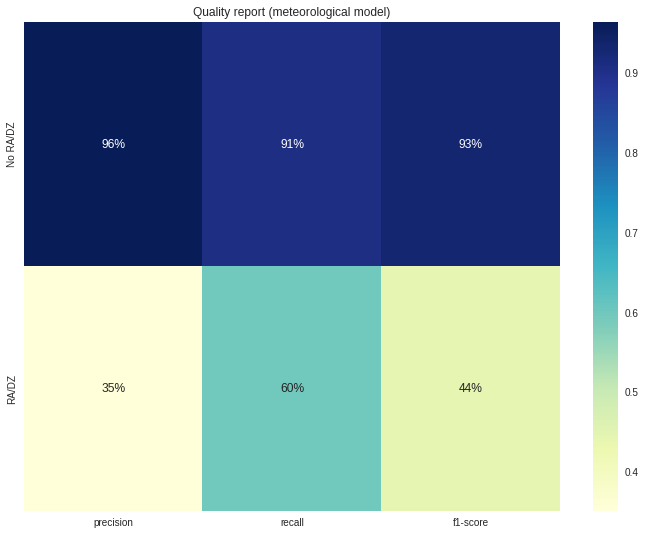

In [79]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Quality report (meteorological model)")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all4k.prec_l, df_all4k.prec0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


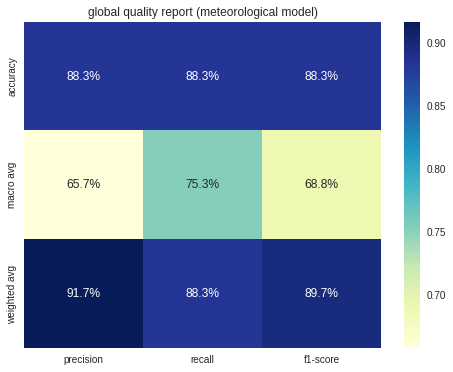

In [80]:
plt.figure(figsize=(8, 6))
plt.title("global quality report (meteorological model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

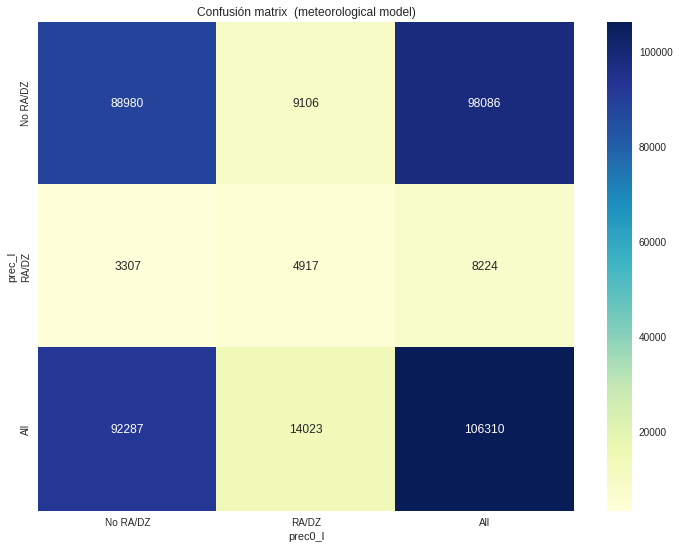

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusión matrix  (meteorological model)")

global_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

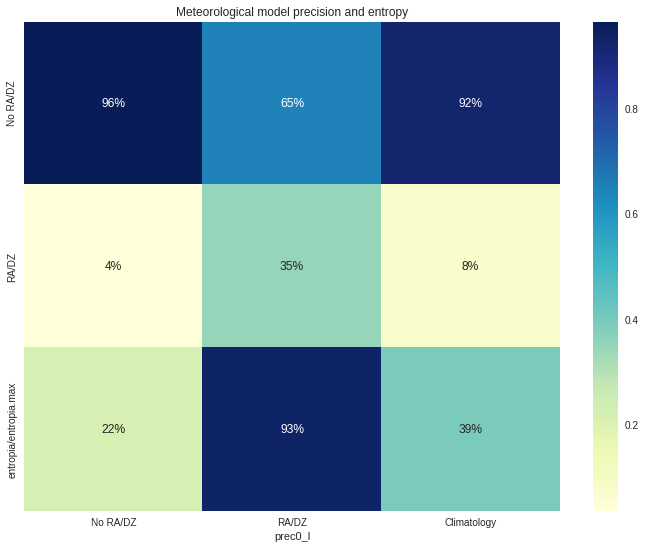

In [82]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Meteorological model precision and entropy")
column_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**Forecast D1**

In [36]:
#ria forecast d1
model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD1.csv",parse_dates=["time"]).set_index("time")
model4k.columns

Index(['dir0', 'mod0', 'wind_gust0', 'mslp0', 'temp0', 'rh0', 'visibility0',
       'lhflx0', 'lwflx0', 'conv_prec0',
       ...
       'cape9', 'cin9', 'cfh9', 'cfl9', 'cfm9', 'cft9', 'HGT5009', 'HGT8509',
       'T5009', 'T8509'],
      dtype='object', length=230)

In [37]:
#label meteorological model prec points 0 to 9
interval=pd.IntervalIndex.from_tuples([(-1, 0.1), (0.1, 50000)])
labels=["No RA/DZ","RA/DZ"]
model4k["prec0_l"]=pd.cut(model4k["prec0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec1_l"]=pd.cut(model4k["prec1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec2_l"]=pd.cut(model4k["prec2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec3_l"]=pd.cut(model4k["prec3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec4_l"]=pd.cut(model4k["prec4"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec5_l"]=pd.cut(model4k["prec5"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec6_l"]=pd.cut(model4k["prec6"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

In [38]:
#concat station model
df_all4k=pd.concat([station,model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["wxcodes_o"])
df_all4k[["prec_l","prec0_l","prec1_l"]].sample(20)

,prec_l,prec0_l,prec1_l
time,,,
2016-09-26 14:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2009-09-23 05:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2020-01-23 20:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2015-08-17 11:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2010-10-15 23:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2018-03-14 12:00:00,No RA/DZ,RA/DZ,RA/DZ
2018-01-08 04:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2014-05-26 14:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2016-12-11 11:00:00,No RA/DZ,No RA/DZ,No RA/DZ


In [39]:
print("station\n",df_all4k["prec_l"].value_counts())
print("point 0\n",df_all4k["prec0_l"].value_counts())
print("point 1\n",df_all4k["prec1_l"].value_counts())
print("point 2\n",df_all4k["prec2_l"].value_counts())
print("point 3\n",df_all4k["prec3_l"].value_counts())
print("point 4\n",df_all4k["prec4_l"].value_counts())
print("point 5\n",df_all4k["prec5_l"].value_counts())

station
 No RA/DZ    102350
RA/DZ         8582
Name: prec_l, dtype: int64
point 0
 No RA/DZ    86954
RA/DZ       23978
Name: prec0_l, dtype: int64
point 1
 No RA/DZ    88581
RA/DZ       22351
Name: prec1_l, dtype: int64
point 2
 No RA/DZ    88885
RA/DZ       22047
Name: prec2_l, dtype: int64
point 3
 No RA/DZ    89073
RA/DZ       21859
Name: prec3_l, dtype: int64
point 4
 No RA/DZ    88541
RA/DZ       22391
Name: prec4_l, dtype: int64
point 5
 No RA/DZ    89852
RA/DZ       21080
Name: prec5_l, dtype: int64


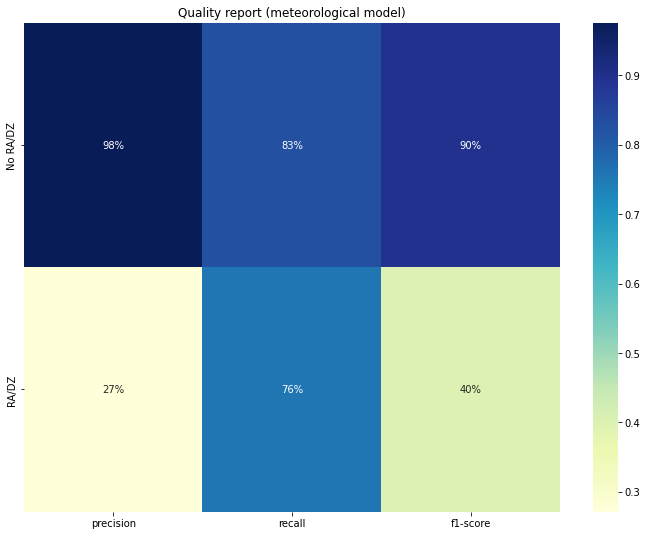

In [40]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Quality report (meteorological model)")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all4k.prec_l, df_all4k.prec0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


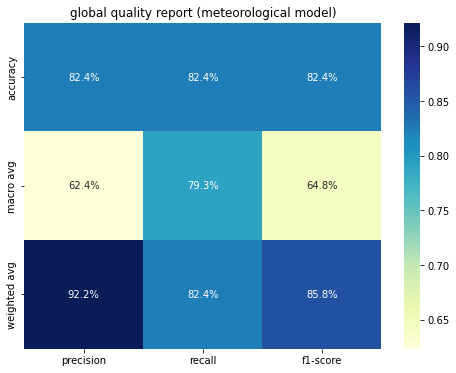

In [41]:
plt.figure(figsize=(8, 6))
plt.title("global quality report (meteorological model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

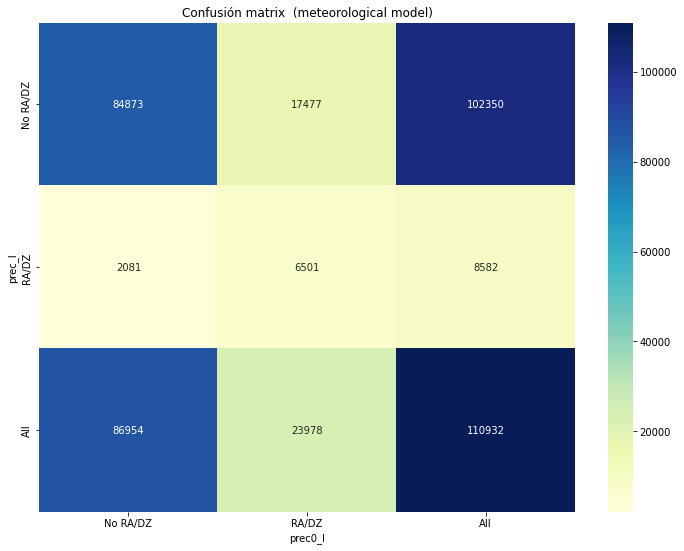

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusión matrix  (meteorological model)")

global_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

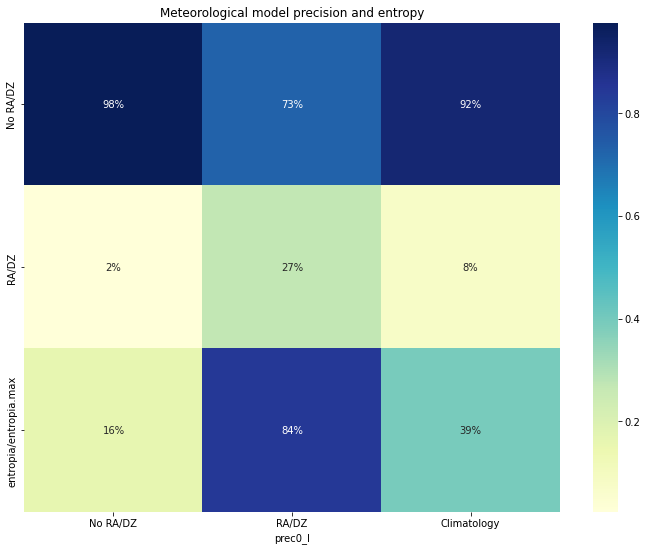

In [43]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Meteorological model precision and entropy")
column_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**Forecast d2**

In [44]:
#ria forecast d2
model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD2.csv",parse_dates=["time"]).set_index("time")
model4k.columns

Index(['dir0', 'mod0', 'wind_gust0', 'mslp0', 'temp0', 'rh0', 'visibility0',
       'lhflx0', 'lwflx0', 'conv_prec0',
       ...
       'cape9', 'cin9', 'cfh9', 'cfl9', 'cfm9', 'cft9', 'HGT5009', 'HGT8509',
       'T5009', 'T8509'],
      dtype='object', length=230)

In [45]:
#label meteorological model prec points 0 to 9
interval=pd.IntervalIndex.from_tuples([(-1, 0.1), (0.1, 50000)])
labels=["No RA/DZ","RA/DZ"]
model4k["prec0_l"]=pd.cut(model4k["prec0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec1_l"]=pd.cut(model4k["prec1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec2_l"]=pd.cut(model4k["prec2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec3_l"]=pd.cut(model4k["prec3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec4_l"]=pd.cut(model4k["prec4"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec5_l"]=pd.cut(model4k["prec5"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model4k["prec6_l"]=pd.cut(model4k["prec6"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

#concat station model
df_all4k=pd.concat([station,model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["wxcodes_o"])
df_all4k[["prec_l","prec0_l","prec1_l"]].sample(20)

,prec_l,prec0_l,prec1_l
time,,,
2010-03-19 09:00:00,No RA/DZ,RA/DZ,RA/DZ
2019-09-24 03:00:00,RA/DZ,RA/DZ,RA/DZ
2010-06-13 02:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2011-07-13 06:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2008-04-30 13:00:00,No RA/DZ,No RA/DZ,No RA/DZ
2017-03-11 12:00:00,RA/DZ,No RA/DZ,No RA/DZ
2012-05-27 11:00:00,No RA/DZ,RA/DZ,RA/DZ
2014-06-06 16:00:00,No RA/DZ,RA/DZ,RA/DZ
2014-09-22 17:00:00,No RA/DZ,No RA/DZ,No RA/DZ


In [46]:
print("station\n",df_all4k["prec_l"].value_counts())
print("point 0\n",df_all4k["prec0_l"].value_counts())
print("point 1\n",df_all4k["prec1_l"].value_counts())
print("point 2\n",df_all4k["prec2_l"].value_counts())
print("point 3\n",df_all4k["prec3_l"].value_counts())
print("point 4\n",df_all4k["prec4_l"].value_counts())
print("point 5\n",df_all4k["prec5_l"].value_counts())

station
 No RA/DZ    102331
RA/DZ         8577
Name: prec_l, dtype: int64
point 0
 No RA/DZ    87618
RA/DZ       23290
Name: prec0_l, dtype: int64
point 1
 No RA/DZ    89071
RA/DZ       21837
Name: prec1_l, dtype: int64
point 2
 No RA/DZ    89341
RA/DZ       21567
Name: prec2_l, dtype: int64
point 3
 No RA/DZ    89401
RA/DZ       21507
Name: prec3_l, dtype: int64
point 4
 No RA/DZ    89089
RA/DZ       21819
Name: prec4_l, dtype: int64
point 5
 No RA/DZ    90247
RA/DZ       20661
Name: prec5_l, dtype: int64


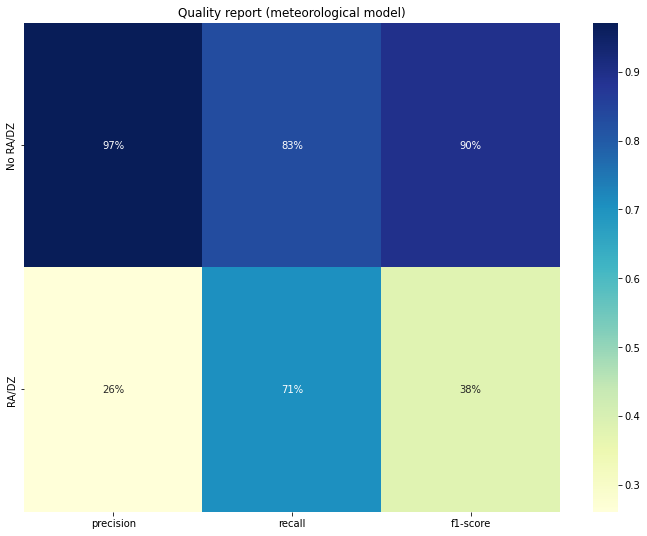

In [47]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Quality report (meteorological model)")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all4k.prec_l, df_all4k.prec0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

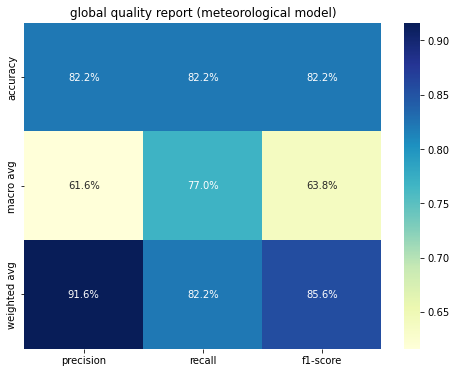

In [48]:
plt.figure(figsize=(8, 6))
plt.title("global quality report (meteorological model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

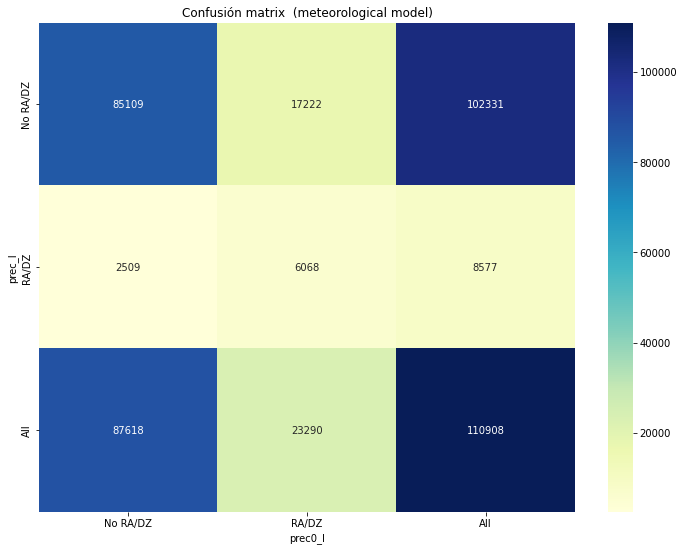

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusión matrix  (meteorological model)")

global_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

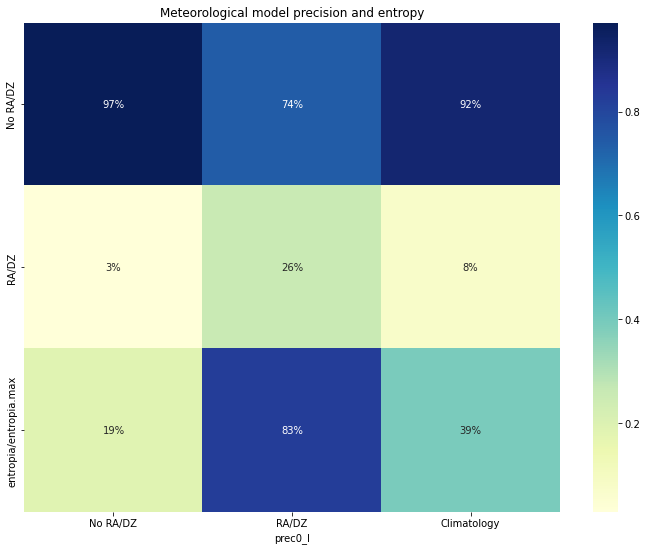

In [50]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Meteorological model precision and entropy")
column_sc=pd.crosstab(df_all4k.prec_l, df_all4k.prec0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**machine learning d2**

In [51]:
from pycaret.classification import *
#drop variables model labeled
clas = setup(df_all4k.drop(columns=["prec0_l","prec1_l","prec2_l",
                                    "prec3_l","prec4_l","prec5_l",
                                    "prec6_l"]),
             target = 'prec_l',
             session_id=20,normalize=False ,train_size=.85,remove_multicollinearity=True,
             fix_imbalance=False,ignore_low_variance=True,feature_selection=True,
             feature_selection_threshold =.15,pca=False,polynomial_features=False,
             trigonometry_features=False,feature_interaction=False)

              

,Description,Value
0,session_id,20
1,Target,prec_l
2,Target Type,Binary
3,Label Encoded,"No RA/DZ: 0, RA/DZ: 1"
4,Original Data,"(110908, 231)"
5,Missing Values,False
6,Numeric Features,230
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [66]:
compare_models(fold=5,sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9324,0.9104,0.2725,0.6473,0.3833,0.3538,0.3914,2.082
et,Extra Trees Classifier,0.9333,0.9120,0.2559,0.6806,0.3719,0.3442,0.3908,9.942
gbc,Gradient Boosting Classifier,0.9312,0.9038,0.2617,0.6317,0.3699,0.3401,0.3775,62.742
ada,Ada Boost Classifier,0.9274,0.8963,0.2724,0.5607,0.3665,0.3329,0.3575,12.248
rf,Random Forest Classifier,0.9328,0.9062,0.2486,0.6751,0.3633,0.3357,0.3831,32.212
nb,Naive Bayes,0.7959,0.8383,0.7280,0.2349,0.3551,0.2699,0.3313,0.154
dt,Decision Tree Classifier,0.8955,0.6519,0.3638,0.3364,0.3495,0.2928,0.2931,3.874
lda,Linear Discriminant Analysis,0.9154,0.8623,0.2870,0.4281,0.3436,0.3002,0.3071,0.556
qda,Quadratic Discriminant Analysis,0.7540,0.8130,0.7965,0.2107,0.3333,0.2406,0.3211,0.332
knn,K Neighbors Classifier,0.9145,0.7580,0.1647,0.3765,0.2291,0.1911,0.2096,69.922


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=20, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [52]:
model=create_model("lightgbm",n_estimators=150,fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9321,0.9112,0.2692,0.6437,0.3797,0.3501,0.3877
1,0.9332,0.9113,0.2825,0.6555,0.3948,0.3653,0.4019
2,0.9321,0.9109,0.2708,0.6427,0.3810,0.3514,0.3885
3,0.9315,0.9093,0.2625,0.6367,0.3718,0.3421,0.3801
4,0.9335,0.9124,0.3045,0.6467,0.4140,0.3836,0.4144
Mean,0.9325,0.9110,0.2779,0.6451,0.3883,0.3585,0.3945
SD,0.0007,0.0010,0.0148,0.0062,0.0149,0.0146,0.0122


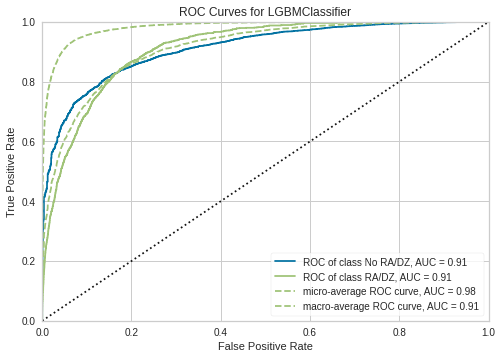

In [53]:
plot_model(model, plot = 'auc')

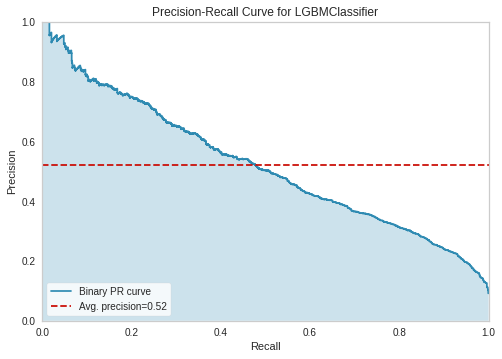

In [54]:
plot_model(model, plot = 'pr')

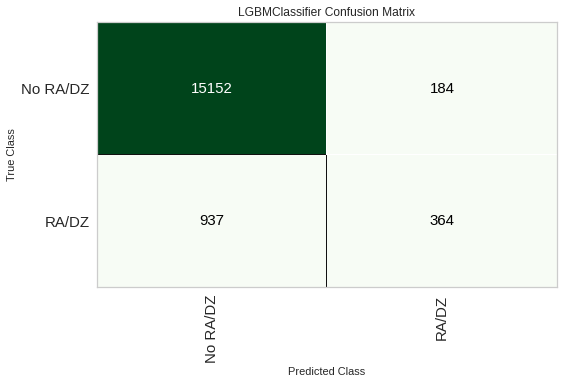

In [55]:
plot_model(model,'confusion_matrix')

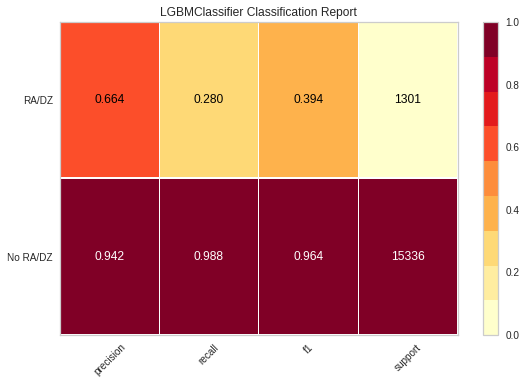

In [56]:
plot_model(model,'class_report')

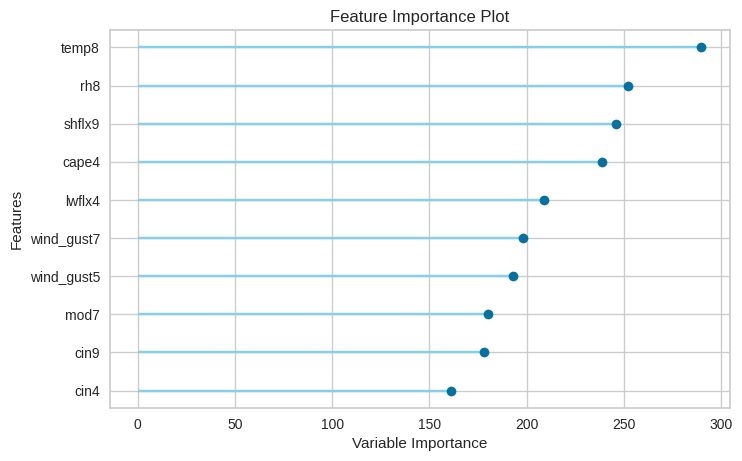

In [57]:
plot_model(model,"feature")

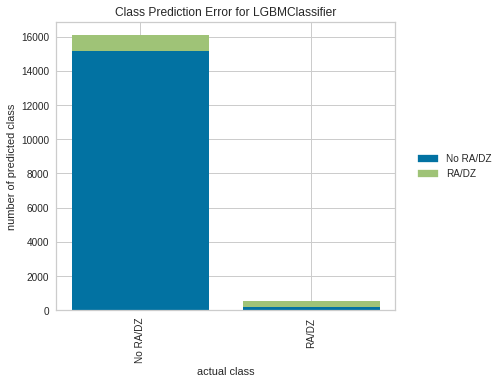

In [58]:
plot_model(model,"error")

**Export model**

In [59]:
x_var=get_config("X_train").columns
x_var

Index(['rh8', 'cft7', 'wind_gust5', 'wind_gust7', 'visibility9', 'shflx9',
       'dir5', 'dir3', 'cfl1', 'cft8', 'mod7', 'temp8', 'dir9', 'cfl2', 'cfm6',
       'visibility0', 'cfl8', 'cfl7', 'dir7', 'cin4', 'cfl9', 'visibility5',
       'cfl4', 'lwflx4', 'visibility3', 'cfl5', 'visibility1', 'cfl0', 'dir4',
       'cfl6', 'cape4', 'cin9', 'cfl3'],
      dtype='object')

In [60]:
#define x and y
Y=df_all4k.prec_l
X=df_all4k[x_var]

In [61]:
#Run the machine learning model
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
#ml_model=ExtraTreesClassifier(n_estimators=150).fit(X_train,y_train)
ml_model=LGBMClassifier(n_estimators=250).fit(X_train,y_train)


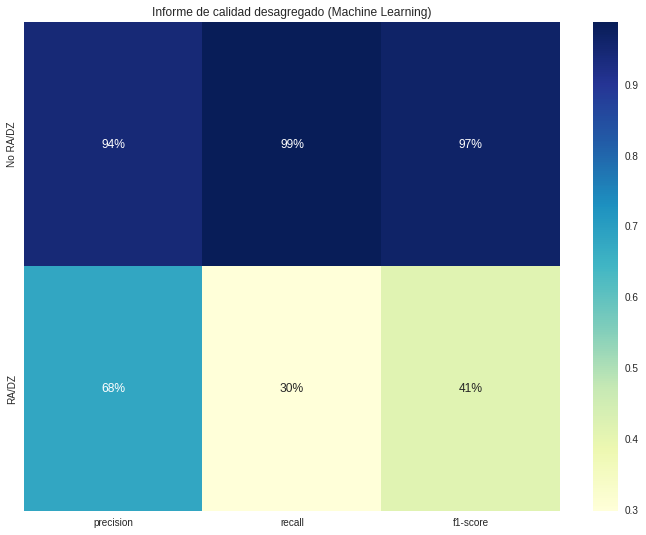

In [62]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cr=pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Informe de calidad desagregado (Machine Learning)")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


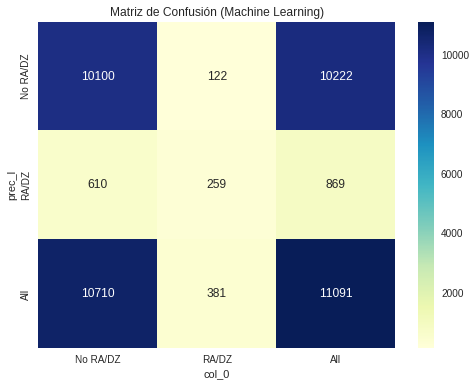

In [63]:
plt.figure(figsize=(8, 6))
plt.title("Matriz de Confusión (Machine Learning)")
import seaborn as sns
global_sc=pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

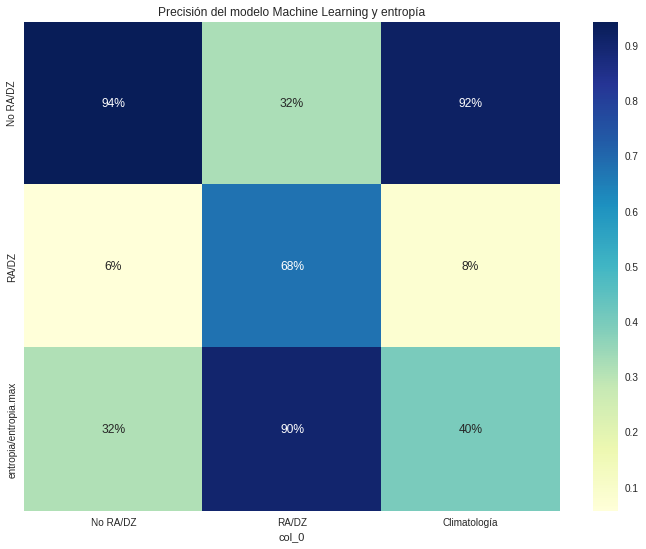

In [64]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precisión del modelo Machine Learning y entropía")
column_sc=pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropia/entropia.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatología"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [65]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("prec_LEVX_d2.al", 'wb'))